In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dir_data = 'D:/3rd-ML100Days_documents/Day_018/data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [2]:
# do the Label Encoder for the class type columns with only two values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# set another column DAYS_EMPLOYED_ANOM to record the anomaly data of DAYS_EMPLOYED, and transform the anamoly values into NAN
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# get the absolute values of DAYS_BIRTH 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [4]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000]
app_train["AMT_INCOME_TOTAL_GROUP"] = pd.cut(app_train["AMT_INCOME_TOTAL"], bins)
app_train["AMT_INCOME_TOTAL_GROUP"].value_counts()

(100000, 200000]          155898
(200000, 300000]           65176
(0, 100000]                63698
(300000, 400000]           14676
(400000, 500000]            5361
(500000, 1000000]           2452
(1000000, 5000000]           245
(10000000, 50000000]           2
(5000000, 10000000]            2
(100000000, 500000000]         1
(50000000, 100000000]          0
Name: AMT_INCOME_TOTAL_GROUP, dtype: int64

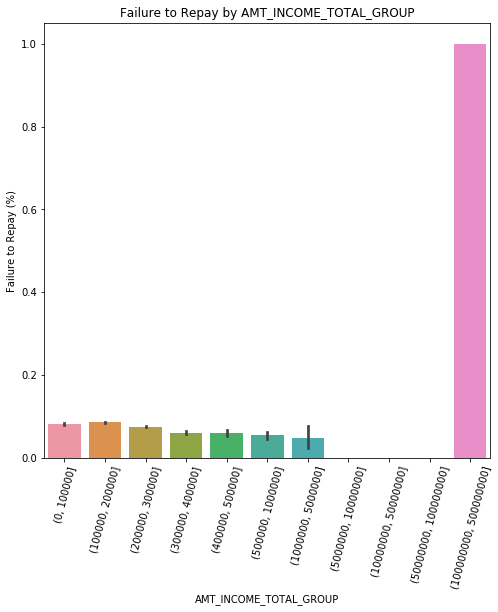

In [5]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# plot barplot of AMT_INCOME_TOTAL as x and target as y
px = app_train['AMT_INCOME_TOTAL_GROUP']
py = app_train['TARGET']
sns.barplot(px, py)

# plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_INCOME_TOTAL_GROUP'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT_INCOME_TOTAL_GROUP');